<a href="https://colab.research.google.com/github/palubad/gee-teaching-cuni/blob/main/python/With_TASKS_GEE_Python_API_Geoinformatika_Wildfire_monitoring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Author: Daniel Paluba
# EO4Landscape research group (eo4landscape.natur.cuni.cz)
# Department of applied geoinformatics and cartography
# Faculty of Science, Charles University, Prague, Czechia
#
# Copyright 2024 Daniel Paluba
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# **Introduction to the Earth Engine Python API + Wildfire monitoring exercise**

This notebook tutorial gives an introduction to Sentinel-2 imagery with Earth Engine, using the Earth Engine Python [client library](https://github.com/google/earthengine-api) with a focus on wildfire monitoring in Greece.

In [ ]:
# import neccessary libraries
import ee                           # Earth Engine
import geemap                       # geemap library
import matplotlib.pyplot as plt     # for figure visualisation
import pandas as pd                 # for data storage and manipulation
from IPython.display import HTML    # to add custom HTML codes

## **Authentication**

Prior to using the Earth Engine Python client library, you need to authenticate (verify your identity) and use the resultant credentials to initialize the Python client. The following authentication flows should use a Cloud projects to authenticate, and they're used for unpaid (free, noncommercial) use as well as paid use. See the Earth Engine Authentication and Initialization guide for troubleshooting and to learn more.

In [ ]:
ee.Authenticate()

## **Initialisation**

The initialization step verifies that valid credentials have been created and populates the Python client library with methods that the backend server supports.

---


**Here, you should add your GEE Cloud Project name.**

In [ ]:
# Change PROJECT_NAME to your GEE Cloud Project name
ee.Initialize(project='PROJECT_NAME')

print('Welcome to the Earth Engine Python API!')

Welcome to the Earth Engine Python API!


In [ ]:
# Classic Python printing
print('Welcome to the Earth Engine Python API!')

# GEE Python API printing
print(ee.String('Welcome to the Earth Engine Python API!').getInfo())

Welcome to the Earth Engine Python API!
Welcome to the Earth Engine Python API!


## Working with Earth Engine Python API

*   Import interactive map from the geemap library.
*   Draw a region of interest using the drawing tools.


In [ ]:
# define the Map using the geemap library
Map = geemap.Map()

In [ ]:
# Import and visualize the Map
display(Map)

# Draw your region of interest (ROI)
QQQ

Map(center=[0, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(childr…

### Load the drawn region of interest from the Map

In [ ]:
# Load the drawn region of interest from the Map
roi = ee.FeatureCollection(Map.draw_features)

# Or define it using Longitude and latitude coordinates
# roi = ee.Geometry.Point([longitude, latitude])

# inspect it
roi

In [ ]:
# Code to remove drawn features from the Map. Uncomment if you want to use it.
# Map.remove_drawn_features()

# Or just remove the last drawing. Uncomment if you want to use it.
# Map.remove_last_drawn()

### Import satellite imagery and filter it

In [ ]:
# Filter the Sentinel-2 image collection
dataset = (ee.ImageCollection('COPERNICUS/S2_SR_HARMONIZED')# Import data
      .filterBounds(roi)                                    # Spatial filter
      .filterDate('2024-01-01', '2024-10-21')               # Temporal filter
      .filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE', 30))  # Metadata filter
      .sort('CLOUDY_PIXEL_PERCENTAGE'))                     # Sort data

# Print data to the Console
display(dataset)

Explore the least cloudy Sentinel-2 image to the Map

In [ ]:
display(dataset.first())

In [ ]:
# Add True color RGB composite to the map
Map.addLayer(
    dataset.first(),
    {'min': 0, 'max': 3000, 'bands': 'B4,B3,B2'},
    "S2 RGB Image"
)

Map.addLayer(
    dataset.first(),
    {'min': 0, 'max': 3000, 'bands': 'B8,B4,B3'},
    "S2 NIR-R-G Image"
)

Map.centerObject(roi, 12)
display(Map)

Map(bottom=101730.0, center=[37.659885575540414, 21.699031499999737], controls=(WidgetControl(options=['positi…

In [ ]:
# To remove layers from the Map use their names.
# Map.remove("S2 RGB Image")

### *** YOUR TASK - Load and filter your image Collection

In [ ]:
QQQ
# 1. Create a new Map
# 2. Draw your area of interest and save it as variable
# 3. Load the Landsat 9 dataset for this year for your area of interest
# 4. Explore the first image in the dataset to find out which attribute
#    holds information about scene cloudiness
# 5. Select only L9 images with less then your defined cloudiness threshold
# 6. Sort the dataset by cloudiness and print the first image
# 7. Add the image to your new Map -

## Study area - Olympia, Greece
*   the second worst wildfire in Greece history (125,000 hectares burned)
*   largest wildfires are in Attica, Olympia (4.-12.8.2021), Messenia, and the
*   most destructive in northern Euboea
*   Date range: 3 August - 3 September
*   total fires 140+

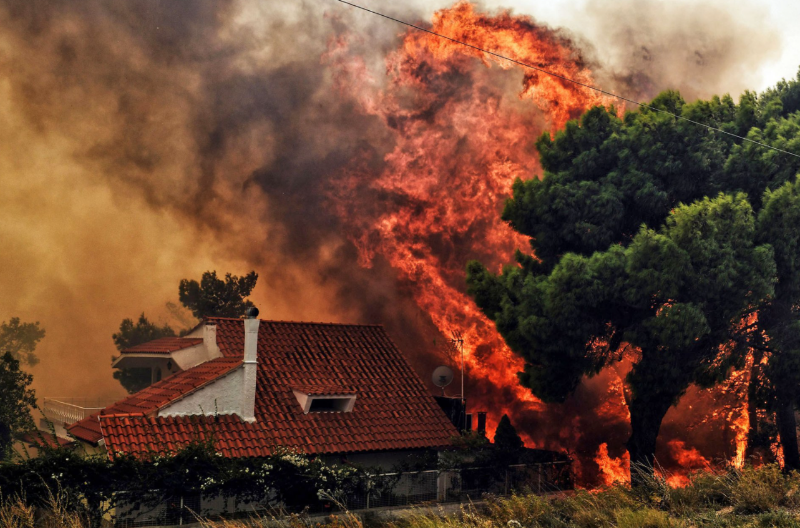







In [ ]:
# Import the animated GIF from a Facebook post
HTML('<iframe src="https://www.facebook.com/plugins/video.php?height=476&href=https%3A%2F%2Fwww.facebook.com%2FCopernicusAcademyAUTh%2Fvideos%2F182416847162143%2F&show_text=false&width=476&t=0" width="476" height="476" style="border:none;overflow:hidden" scrolling="no" frameborder="0" allowfullscreen="true" allow="autoplay; clipboard-write; encrypted-media; picture-in-picture; web-share" allowFullScreen="true"></iframe>')

### Define a new region of interest - near Olympia, Greece

In [ ]:
# Define the region of interest
burned = ee.Geometry.Polygon(
        [[[21.66448668242632, 37.675104643566485],
          [21.62946776152788, 37.670756736319234],
          [21.652813708793506, 37.641401699488746],
          [21.68714598418413, 37.65771148609171]]]);

## Cloud masking of Sentinel-2 data using the CloudScore+



![plot](https://miro.medium.com/v2/resize:fit:1400/format:webp/1*kEjj2z21U6PGFeLKfpRdKQ.png)
<br>
Source: [All Clear with Cloud Score+ Medium article](https://medium.com/google-earth/all-clear-with-cloud-score-bd6ee2e2235e)

Find out more about the [CloudScore+ in the Medium article](https://medium.com/google-earth/all-clear-with-cloud-score-bd6ee2e2235e) or in [their full paper Pasquarella et al. 2023](https://openaccess.thecvf.com/content/CVPR2023W/EarthVision/papers/Pasquarella_Comprehensive_Quality_Assessment_of_Optical_Satellite_Imagery_Using_Weakly_Supervised_CVPRW_2023_paper.pdf) [to understand the theory and algorithms behind it].
A case study for Ecuador with a comparison with other cloud-masking approaches, e.g. the S2CloudLess from Synergise can be found in this [Medium article](https://medium.com/google-earth/cloud-score-in-action-land-cover-mapping-in-ecuador-fd1c5c424317)

### Create a function for cloud masking

In [ ]:
# Load the CloudScore+ dataset containing cloud probabilities for each image
csPlus = ee.ImageCollection('GOOGLE/CLOUD_SCORE_PLUS/V1/S2_HARMONIZED')

# The threshold for masking; values between 0.50 and 0.65 generally work well.
CLEAR_THRESHOLD = 0.60
QA_BAND = 'cs'

# Function to mask clouds using the Sentinel-2 QA band
def maskS2clouds(img):
  mask = img.select(QA_BAND).gte(CLEAR_THRESHOLD)
  return img.updateMask(mask)

In [ ]:
# Filter the Sentinel-2 image collection
S2 = (ee.ImageCollection('COPERNICUS/S2_SR_HARMONIZED')     # Import data
      .filterBounds(burned)                                 # Spatial filter
      .filterDate('2021-06-01', '2021-10-01')               # Temporal filter
      .filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE', 30))  # Metadata filter
      .linkCollection(csPlus,[QA_BAND])                     # Link with CloudScore+
      .sort('CLOUDY_PIXEL_PERCENTAGE')                      # Sort data
      )

# Print data
display(S2)

In [ ]:
# Apply the cloud masking approach for each image separately
S2_cloudless = S2.map(maskS2clouds)                                    # Mask out clouds
display(S2_cloudless)

### Visualize the effect of cloud filtering

In [ ]:
# First, select the most cloud image in the selected time frame
cloudy_image = S2.sort('CLOUDY_PIXEL_PERCENTAGE',False).first() # True for ascending (default), False for descending
cloudless_image = S2_cloudless.sort('CLOUDY_PIXEL_PERCENTAGE',False).first() # True for ascending (default), False for descending

# Add images to the Map
Map.addLayer(
    cloudy_image,
    {'min': 0, 'max': 3000, 'bands': 'B4,B3,B2'},
    "S2 cloudy_image"
)

Map.addLayer(
    cloudless_image,
    {'min': 0, 'max': 3000, 'bands': 'B4,B3,B2'},
    "S2 cloudless_image"
)

display(Map)

Map(bottom=812.0, center=[0, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=Search…

### **BONUS**: create a cloud free composite of Greece using all available images in 2024

#### Work with vector data

In [ ]:
# Load LSIB countries and load the selected one
countries = ee.FeatureCollection('USDOS/LSIB_SIMPLE/2017')

# Explore the dataset
display(countries.first())

In [ ]:
# Select Greece polygon
Greece = countries.filter(ee.Filter.eq('country_na', 'Greece'))

In [ ]:
Map.addLayer(Greece,{'color':'red'},'Greece polygon')

Map.centerObject(Greece, 6)
display(Map)

Map(bottom=812.0, center=[39.020608964931604, 22.992355729256687], controls=(WidgetControl(options=['position'…

In [ ]:
# Prepare S2 data for greece
S2_Greece = (
       ee.ImageCollection('COPERNICUS/S2_SR_HARMONIZED')    # Import data
      .filterBounds(Greece)                                 # Spatial filter
      .filterDate('2024-01-01', '2024-10-20')               # Temporal filter
      .filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE', 30))  # Metadata filter
      .linkCollection(csPlus,[QA_BAND])                     # Link with CloudScore+
      .map(maskS2clouds)                                    # Mask out the clouds
      )

# Create a median composite and clip it using the Greece feature
cloudfree_greece = S2_Greece.median().clip(Greece)

# Print the size of the dataset used for composite creation
print('The size of the entire image collection for 2024 (so far) is', S2_Greece.size().getInfo())

The size of the entire image collection for 2024 (so far) is 3747


In [ ]:
# Create a new map for Greece
Greece_map = geemap.Map()

Greece_map.addLayer(Greece,{'color':'red'},'Greece polygon')

# Add it to the map
Greece_map.addLayer(cloudfree_greece,
 {'min': 0, 'max': 3000, 'bands': 'B4,B3,B2'},
 "Cloude free composite for Greece"
)

# Center the map and visualise it
Greece_map.centerObject(Greece, 7)
display(Greece_map)

Map(center=[39.020608964931604, 22.992355729256687], controls=(WidgetControl(options=['position', 'transparent…

### *** YOUR TASK - Create a cloud-free mosaic for a different country

In [ ]:
QQQ
# Work with vector data to select a different country
# Filter the image collection
# Apply the cloud-masking approach to each image
# Visualise that composite on the Map

## Calculate the Normalized Burned Ratio index

The Normalized Burn Ratio (NBR) is calculated using the following formula:

$$
\text{NBR} = \frac{\text{NIR} - \text{SWIR}}{\text{NIR} + \text{SWIR}}
$$

Where:
- **NIR** is the near-infrared band.
- **SWIR** is the shortwave infrared band.

<br></br>
Find out more about NBR [here](https://support.climateengine.org/article/123-normalized-burn-ratio).
<br></br>
![plot](https://d33v4339jhl8k0.cloudfront.net/docs/assets/637d3085483e942ba866b26e/images/64beb58957a4e8315e721be2/file-BCK9LN3KVT.png)
<br>Source: [Climate Engine / US Forest Service](https://support.climateengine.org/article/123-normalized-burn-ratio)





In [ ]:
# Function to add NBR index
def addNBR(image):
    return image.addBands(image.normalizedDifference(['B8', 'B12']).rename('NBR'))

# Add it to each image
S2_cloudless = S2_cloudless.map(addNBR)

# Print data
display(S2_cloudless)

In [ ]:
# define a new map, name it Map2
Map2 = geemap.Map()

In [ ]:
# Add the RGB composite to the Map2
Map2.addLayer(
    S2_cloudless.first(),
    {'min': 0, 'max': 3000, 'bands': 'B4,B3,B2'},
    "RGB Image"
)

# Add the NBR composite to the Map2
Map2.addLayer(
    S2_cloudless.first(),
    {'min': -1, 'max': 1, 'bands': 'NBR'},
    "NBR Image"
)

In [ ]:
# Center the map and visualise it
Map2.centerObject(S2.first(), 10)
display(Map2)

Map(center=[37.451185907505064, 21.620337611897003], controls=(WidgetControl(options=['position', 'transparent…

### *** YOUR TASK - Calculate a different spectral index, e.g. NDVI

In [ ]:
QQQ
# Define a function to calculate a different spectral index
# Calculate it for each image in the selected collection
# Show the index in the map
# BONUS: Adjust colors

## Compare pre- and post-fire NBRs and Atmospheric Penetration Composites (APC)

In [ ]:
pre_fire_image = S2_cloudless.filterDate('2021-08-01','2021-08-02').first();
post_fire_image = S2_cloudless.filterDate('2021-08-16','2021-08-17').first();

Map2.addLayer(pre_fire_image,
            {'min':0,'max':3000,'bands':"B12,B11,B9"},
            "pre_fire_image APC");

Map2.addLayer(pre_fire_image,
            {'min':-1,'max':1,'bands':"NBR"},
            "pre_fire_image NBR Image");

Map2.addLayer(post_fire_image,
            {'min':0,'max':3000,'bands':"B12,B11,B9"},
            "post_fire_image APC");

Map2.addLayer(post_fire_image,
            {'min':-1,'max':1,'bands':"NBR"},
            "post_fire_image NBR Image");

## Calculate the dNBR a visualise the burned areas

![plot](https://un-spider.org/sites/default/files/table+legend.PNG)
<br>Burn severity levels obtained calculating dNBR, proposed by USGS. Source: [United Nations/USGS](https://un-spider.org/advisory-support/recommended-practices/recommended-practice-burn-severity/in-detail/normalized-burn-ratio)

In [ ]:
# Calculate the dNBR
dNBR = pre_fire_image.select('NBR').subtract(post_fire_image.select('NBR')).rename('dNBR')

# High and very high burned severity
modAndHighBS = dNBR.gt(0.42);

Map2.addLayer(dNBR,
            {'min':-1,'max':1,'bands':"dNBR"},
            "dNBR Image");

Map2.addLayer(modAndHighBS,
            {'min':-1,'max':1,'bands':"dNBR"},
            "High and very high burned severity");

display(Map2)

Map(center=[37.451185907505064, 21.620337611897003], controls=(WidgetControl(options=['position', 'transparent…

### Create a nicely visualised map

In [ ]:
# Define the thresholds for the severity levels
thresholds = [-0.500, -0.250, -0.100, 0.100, 0.270, 0.440, 0.660, 1.300]

# Define the color palette matching the provided image
palette = [
    '005400',  # Enhanced Regrowth, high (post-fire)
    '7cfc00',  # Enhanced Regrowth, low (post-fire)
    '00ff00',  # Unburned
    'ffff00',  # Low Severity
    'ffcc99',  # Moderate-low Severity
    'ff9900',  # Moderate-high Severity
    '9900ff'   # High Severity
]

# Reclassify the image into severity levels based on the thresholds
reclassified_dnbr = dNBR.clamp(-0.500, 1.300) \
    .expression(
    'b(0) < -0.250 ? 1 : ' +   # Enhanced Regrowth, high
    'b(0) < -0.100 ? 2 : ' +   # Enhanced Regrowth, low
    'b(0) < 0.100  ? 3 : ' +   # Unburned
    'b(0) < 0.270  ? 4 : ' +   # Low Severity
    'b(0) < 0.440  ? 5 : ' +   # Moderate-low Severity
    'b(0) < 0.660  ? 6 : ' +   # Moderate-high Severity
    '7'                      # High Severity
)

# Use the classified image to apply the color palette
dnbr_viz_params = {
    'min': 1,
    'max': 7,
    'palette': palette
}

# Add the dNBR layer to the map with the set visualisation parameters
Map2.centerObject(dNBR, 10)
Map2.addLayer(reclassified_dnbr, dnbr_viz_params, 'dNBR Visualization')

Map2

Map(bottom=202856.0, center=[37.45109979300865, 21.620446106944527], controls=(WidgetControl(options=['positio…

## Create time series plots

In [ ]:
# Access the point drawn to the map
point = ee.FeatureCollection(Map2.draw_features)

In [ ]:
# Create a function
def extract_nbr(image):
    mean_NBR = image.select('NBR').reduceRegion(
        reducer=ee.Reducer.mean(),
        geometry=point,
        scale=10
    )
    # Return a table = a feature with no geometry [None]
    return ee.Feature(None, {
        'date': image.date().format('YYYY-MM-dd'),
        'NBR': mean_NBR.get('NBR')
    })

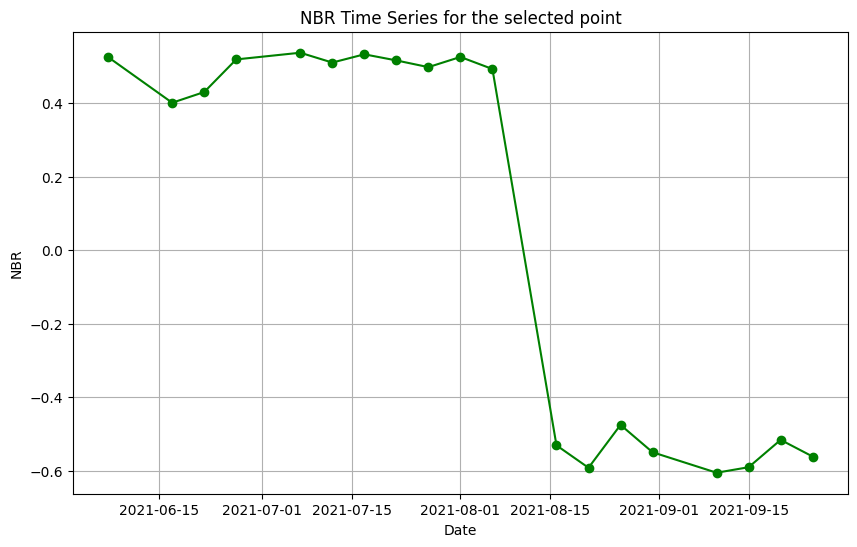

In [ ]:
# Map the extract function over the collection to create a feature collection of NBR values
time_series = S2_cloudless.filterBounds(point).map(extract_nbr)
time_series = time_series.filter(ee.Filter.notNull(['NBR']))

# order by dates
time_series = time_series.sort('date')

# Convert the feature collection to a list and extract it for plotting
nbr_list = time_series.aggregate_array('NBR').getInfo()
date_list = time_series.aggregate_array('date').getInfo()

# Plot NDVI Time Series using matplotlib
# Convert date strings to Python datetime
dates = pd.to_datetime(date_list)

plt.figure(figsize=(10, 6))
plt.plot(dates, nbr_list, marker='o', linestyle='-', color='green')
plt.title('NBR Time Series for the selected point')
plt.xlabel('Date')
plt.ylabel('NBR')
plt.grid(True)
plt.show()

### *** YOUR TASK - visualise time series of your selected index for your selected point / area of interest

In [ ]:
QQQ
# Advise: Use the image collection with your defined spectral
#         index to fasten this process
# Define your area of interest
# Generate time series for your area